# Máquina de chicles 2

Ejemplifica la creación de un autómata finito no determinístico

In [1]:
import os
import sys

In [31]:
from maquinas.regular.ndfa import NonDeterministicFiniteAutomaton as NDFA
from maquinas.regular.ndfa_e import NonDeterministicFiniteAutomaton_epsilon as NDFA_e
from maquinas.regular.ndfa_e import epsilon
from maquinas.regular.reductions import *
from maquinas.regular.minimization import *

In [17]:
# Creating automata finito no deterministico
chicles=NDFA_e(Q=['q0','q1','q2','q3','q4','q5','q6','q7','a0','a1','a2','a3','a4',
                'e0','e1','e2','e3','e4','e5','e6','e7'
                 ],
                         sigma=['1','2','5','B'],
                         q_0='q0',
                         A=['e0','e1','e2','e3','e4','e5','e6','e7'],
                         delta=[
                            (('q0','1'),['q1']),
                            (('q0','2'),['q2']),
                            (('q0','5'),['q5']),
                            (('q1','1'),['q2']),
                            (('q1','2'),['q3']),
                            (('q1','5'),['q6']),                             
                            (('q2','1'),['q3']),
                            (('q2','2'),['q4']),
                            (('q2','5'),['q7']),
                            (('q3','1'),['q4']),
                            (('q3','2'),['q5']),
                            (('q3','5'),['a0']),
                            (('q4','1'),['q5']),
                            (('q4','2'),['q6']),
                            (('q4','5'),['a1']),
                            (('q5','1'),['q6']),
                            (('q5','2'),['q7']),
                            (('q5','5'),['a2']),
                            (('q6','1'),['q7']),
                            (('q6','2'),['a0']),
                            (('q6','5'),['a3']),
                            (('q7','1'),['a0']),
                            (('q7','2'),['a1']),
                            (('q7','5'),['a4']),
                            (('a0',epsilon),['q0']),
                            (('a1',epsilon),['q1']),
                            (('a2',epsilon),['q2']),
                            (('a3',epsilon),['q3']),
                            (('a4',epsilon),['q4']),
                            (('q0','B'),['e0']),
                            (('q1','B'),['e1']),
                            (('q2','B'),['e2']),
                            (('q3','B'),['e3']),
                            (('q4','B'),['e4']),
                            (('q5','B'),['e5']),
                            (('q6','B'),['e6']),
                            (('q7','B'),['e7']),
                             
                         ])

In [18]:
print(chicles.summary())

States  : q0, q1, q2, q3, q4, q5, q6, q7, a0, a1, a2, a3, a4, e0, e1, e2, e3, e4, e5, e6, e7
Sigma   : ε, 1, 2, 5, B
Initial : q0
Aceptors: e4, e2, e3, e0, e1, e7, e5, e6
Transitions:
 q0,1 → ('q1',)
 q0,2 → ('q2',)
 q0,5 → ('q5',)
 q0,B → ('e0',)
 q1,1 → ('q2',)
 q1,2 → ('q3',)
 q1,5 → ('q6',)
 q1,B → ('e1',)
 q2,1 → ('q3',)
 q2,2 → ('q4',)
 q2,5 → ('q7',)
 q2,B → ('e2',)
 q3,1 → ('q4',)
 q3,2 → ('q5',)
 q3,5 → ('a0',)
 q3,B → ('e3',)
 q4,1 → ('q5',)
 q4,2 → ('q6',)
 q4,5 → ('a1',)
 q4,B → ('e4',)
 q5,1 → ('q6',)
 q5,2 → ('q7',)
 q5,5 → ('a2',)
 q5,B → ('e5',)
 q6,1 → ('q7',)
 q6,2 → ('a0',)
 q6,5 → ('a3',)
 q6,B → ('e6',)
 q7,1 → ('a0',)
 q7,2 → ('a1',)
 q7,5 → ('a4',)
 q7,B → ('e7',)
 a0,ε → ('q0',)
 a1,ε → ('q1',)
 a2,ε → ('q2',)
 a3,ε → ('q3',)
 a4,ε → ('q4',)


In [19]:
for q,a,w_ in chicles.delta_stepwise("521B"):
    if a:
        print(f"{a} -> {q}", end=", ")
    else:
        print(f"{q}",end=", ")
    res=q
    
print(f"\nCon {res} Se acepta?", "Sí" if chicles.accept(res) else "No" )

{'q0'}, 5 -> {'q5'}, 2 -> {'q7'}, 1 -> {'q0', 'a0'}, B -> {'e0'}, 
Con {'e0'} Se acepta? Sí


In [20]:
chicles.table()

,1,2,5,B,ε
a0,∅,∅,∅,∅,q0
a1,∅,∅,∅,∅,q1
a2,∅,∅,∅,∅,q2
a3,∅,∅,∅,∅,q3
a4,∅,∅,∅,∅,q4
e0,∅,∅,∅,∅,∅
e1,∅,∅,∅,∅,∅
e2,∅,∅,∅,∅,∅
e3,∅,∅,∅,∅,∅
e4,∅,∅,∅,∅,∅


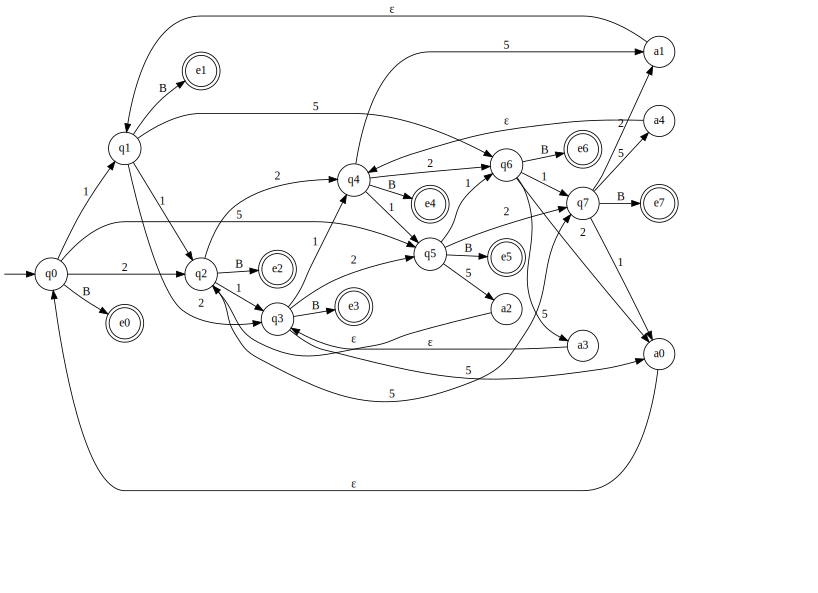

In [21]:
chicles.graph()

In [22]:
chicles.table()

,1,2,5,B,ε
a0,∅,∅,∅,∅,q0
a1,∅,∅,∅,∅,q1
a2,∅,∅,∅,∅,q2
a3,∅,∅,∅,∅,q3
a4,∅,∅,∅,∅,q4
e0,∅,∅,∅,∅,∅
e1,∅,∅,∅,∅,∅
e2,∅,∅,∅,∅,∅
e3,∅,∅,∅,∅,∅
e4,∅,∅,∅,∅,∅


In [32]:
chicles_ndfa=ndfa_e2ndfa(chicles,remove_sink=False)

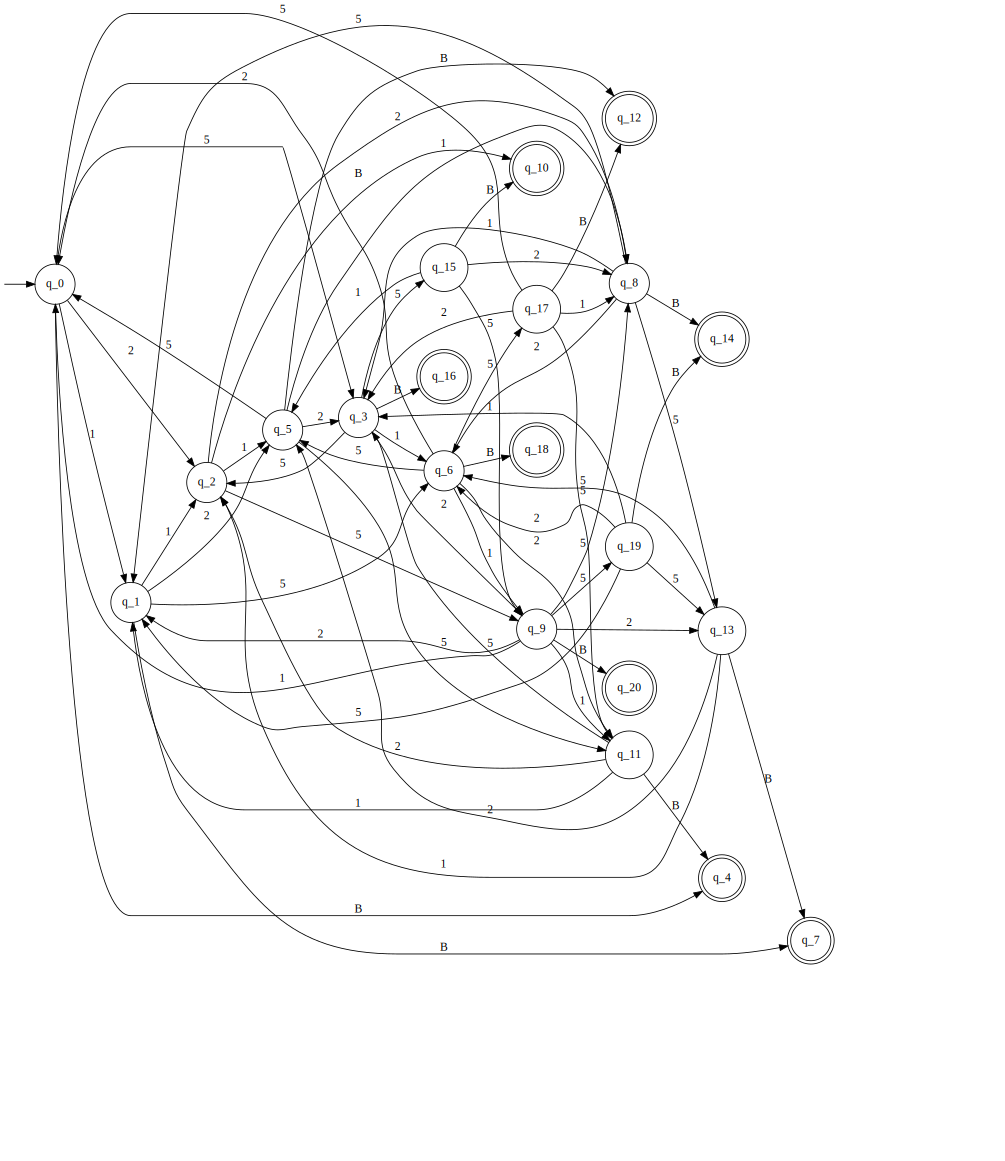

In [33]:
chicles_ndfa.graph()

In [34]:
chicles_ndfa.table()

,1,2,5,B
⟶q_0,q_1,q_2,q_3,q_4
q_1,q_2,q_5,q_6,q_7
q_10,∅,∅,∅,∅
q_11,q_1,q_2,q_3,q_4
q_12,∅,∅,∅,∅
q_13,q_2,q_5,q_6,q_7
q_14,∅,∅,∅,∅
q_15,q_5,q_8,q_9,q_10
q_16,∅,∅,∅,∅
q_17,q_8,q_3,"q_11,q_0",q_12


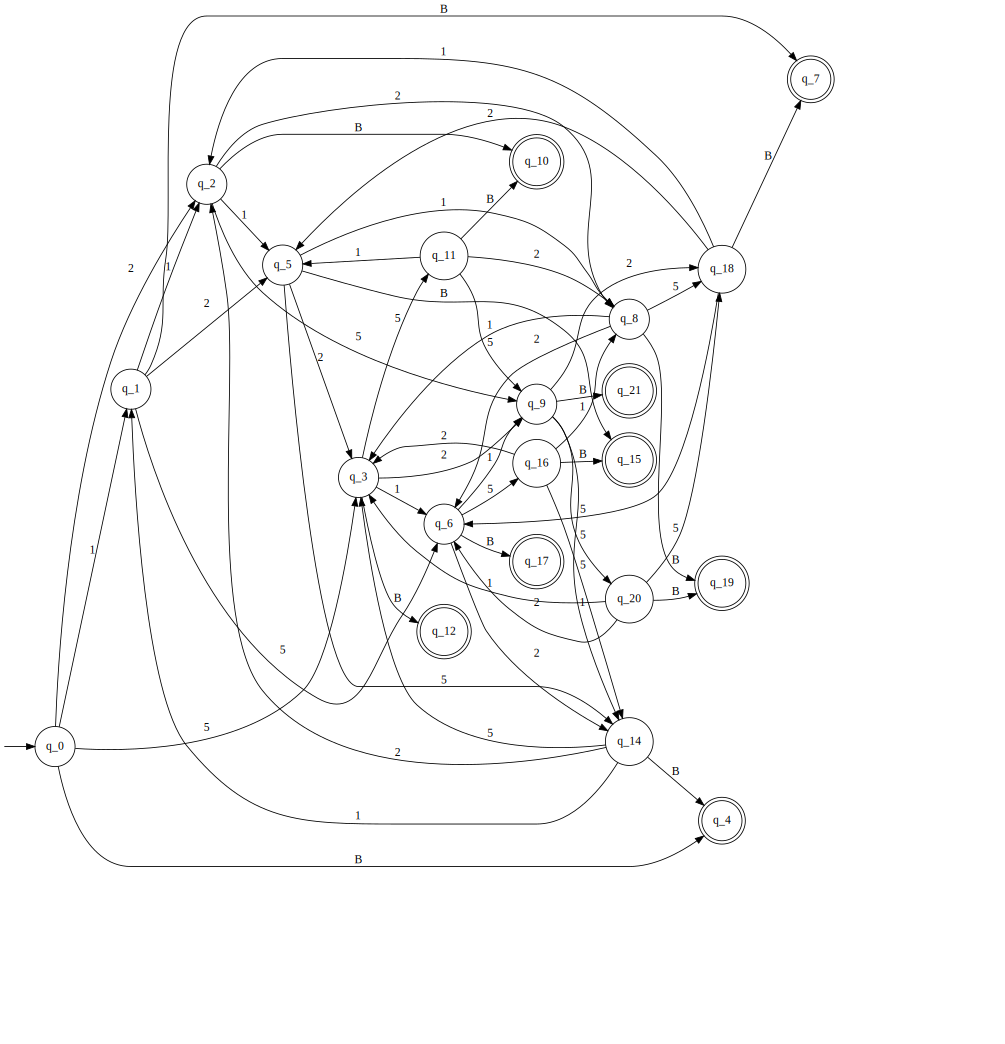

In [35]:
chicles_dfa=ndfa2dfa(chicles_ndfa)
chicles_dfa.graph()

In [36]:
chicles_dfa.table()

,1,2,5,B
⟶q_0,q_1,q_2,q_3,q_4
q_1,q_2,q_5,q_6,q_7
q_10,,,,
q_11,q_5,q_8,q_9,q_10
q_12,,,,
q_14,q_1,q_2,q_3,q_4
q_15,,,,
q_16,q_8,q_3,q_14,q_15
q_17,,,,
q_18,q_2,q_5,q_6,q_7


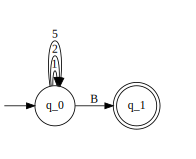

In [38]:
chicles_min=minimization_hopcroft(chicles_dfa)
chicles_min.graph()